# Analytical Base Table Construction

## Summary

### Setup Dependencies

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

### Load Dataset

In [8]:
df = pd.read_csv('data/employee_data.csv')

### Drop wanted observations

In [9]:
print(df.shape)
df.drop_duplicates()
print(df.shape)

(14249, 10)
(14249, 10)


### Display unique classes of the department

In [10]:
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [11]:
df = df[df.department != 'temp']
df.shape

(14068, 10)

### Fix structural errors
print unique values 

In [12]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


Filled missing values

In [13]:
df['filed_complaint'] = df.filed_complaint.fillna(0)
df['recently_promoted'] = df.recently_promoted.fillna(0)

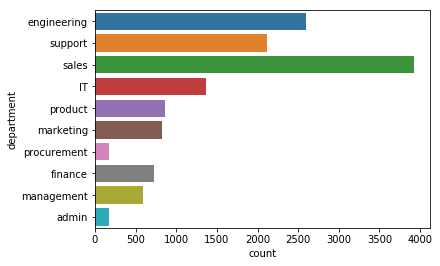

In [15]:
df.department.replace('information_technology','IT', inplace=True)
sns.countplot(y='department', data=df)

### Handle Missing Data

In [16]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [17]:
df.department.fillna(0, inplace=True)

In [18]:
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [21]:
df.last_evaluation.fillna(0, inplace=True)

In [22]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

### Engineer Featurues

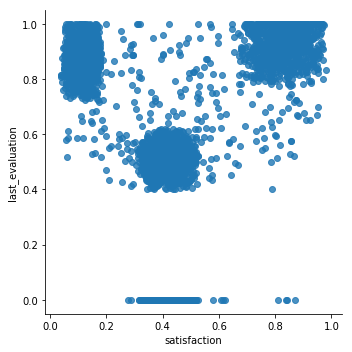

In [24]:
sns.lmplot(x='satisfaction', y='last_evaluation', data=df[df.status == 'Left'], fit_reg=False)

Split in 3 new features: 
- underperformer
- unhappy
- overachiever

In [25]:
df['underperformer'] = (df.last_evaluation < 0.6) & (df.last_evaluation_missing == 0)
df['unhappy'] = df.satisfaction < 0.2
df['overachiever'] = (df.last_evaluation > 0.8) & (df.satisfaction > 0.7)

In [26]:
# The proportions of observations belonging to each grop
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

### Save ABT (Analytical Base Table)

Convert 'status' into an indicator variable.   
- 'Left' should be 1    
- 'Employed' should be 0    

There's also a really easy way you can use pd.get_dummies() here. See below.

In [32]:
df['status'] = pd.get_dummies(df.status).Left

In [33]:
df.status.mean()

0.23933750355416547

In [34]:
df = pd.get_dummies(df, columns=['department', 'salary'])
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,False,...,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,False,...,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,False,...,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,True,...,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,False,...,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,True,...,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,False,...,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,False,...,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,True,...,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,False,...,0,0,0,0,0,0,1,0,0,1


### Save analytical base table to file 

In [35]:
df.to_csv('data/analytical_base_table.csv', index=None)